In [2]:
import pandas as pd

df_cleaned = pd.read_csv("df_cleaned.csv")
df_cleaned.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [3]:
df_cleaned['income'] = df_cleaned['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [4]:
df_cleaned.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0


In [6]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
df_encoded = df_cleaned.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

X = df_encoded.drop('income', axis=1)
y = df_encoded['income']

mi_scores = mutual_info_classif(X, y, discrete_features='auto')
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

print("📊 Mutual Information Scores:")
print(mi_series)

📊 Mutual Information Scores:
relationship      0.115365
marital.status    0.111610
capital.gain      0.083311
age               0.066389
education         0.065573
occupation        0.065141
education.num     0.064036
hours.per.week    0.044498
capital.loss      0.041415
sex               0.034939
fnlwgt            0.030522
workclass         0.016624
race              0.010679
native.country    0.010087
dtype: float64


/var/folders/7z/5gvhbwl101g21n_ymwk1n0s40000gn/T/ipykernel_5894/943672729.py:18: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7z/5gvhbwl101g21n_ymwk1n0s40000gn/T/ipykernel_5894/943672729.py:21: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.savefig("charts/question1_correlation_matrix.png", bbox_inches='tight')
/Users/vimu/Documents/Data Science/SDS/Collaborative Project/SDS-CP034-incomeinsight/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


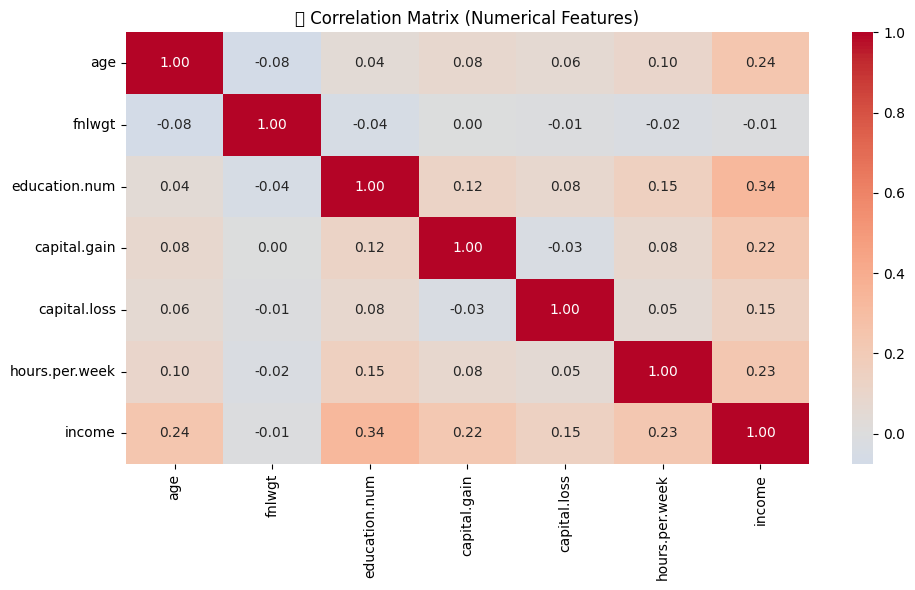

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Ensure the 'charts' directory exists
os.makedirs("charts", exist_ok=True)

# Select only numerical columns (including income)
num_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
correlation_matrix = df_cleaned[num_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title("🔍 Correlation Matrix (Numerical Features)")
plt.tight_layout()

# Save the chart
plt.savefig("charts/question1_correlation_matrix.png", bbox_inches='tight')

# Show in notebook
plt.show()

In [8]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

# Example: Cramér's V between sex and income
cramers_v(df_cleaned['sex'], df_cleaned['income'])

np.float64(0.216616781879119)

/var/folders/7z/5gvhbwl101g21n_ymwk1n0s40000gn/T/ipykernel_5894/3319950536.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_series.values, y=mi_series.index, palette="viridis")
/var/folders/7z/5gvhbwl101g21n_ymwk1n0s40000gn/T/ipykernel_5894/3319950536.py:14: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7z/5gvhbwl101g21n_ymwk1n0s40000gn/T/ipykernel_5894/3319950536.py:17: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.savefig("charts/question1_mutual_info.png", bbox_inches='tight')
/Users/vimu/Documents/Data Science/SDS/Collaborative Project/SDS-CP034-incomeinsight/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS})

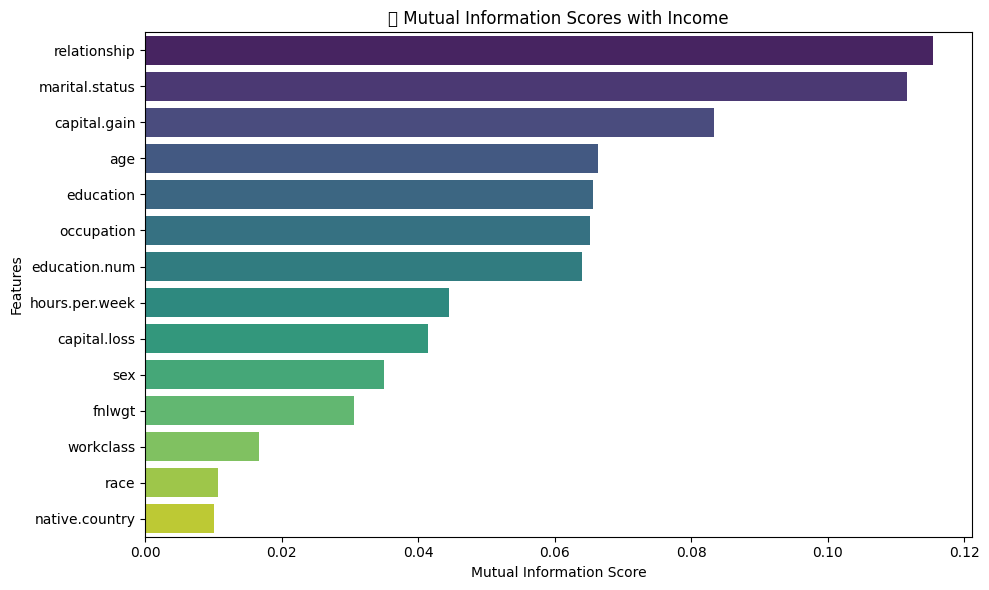

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create 'charts' directory if it doesn't exist
os.makedirs("charts", exist_ok=True)

# Plot and save Mutual Information scores
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_series.values, y=mi_series.index, palette="viridis")
plt.title("🔍 Mutual Information Scores with Income")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.tight_layout()

# Save chart to file
plt.savefig("charts/question1_mutual_info.png", bbox_inches='tight')

# Show chart in notebook
plt.show()

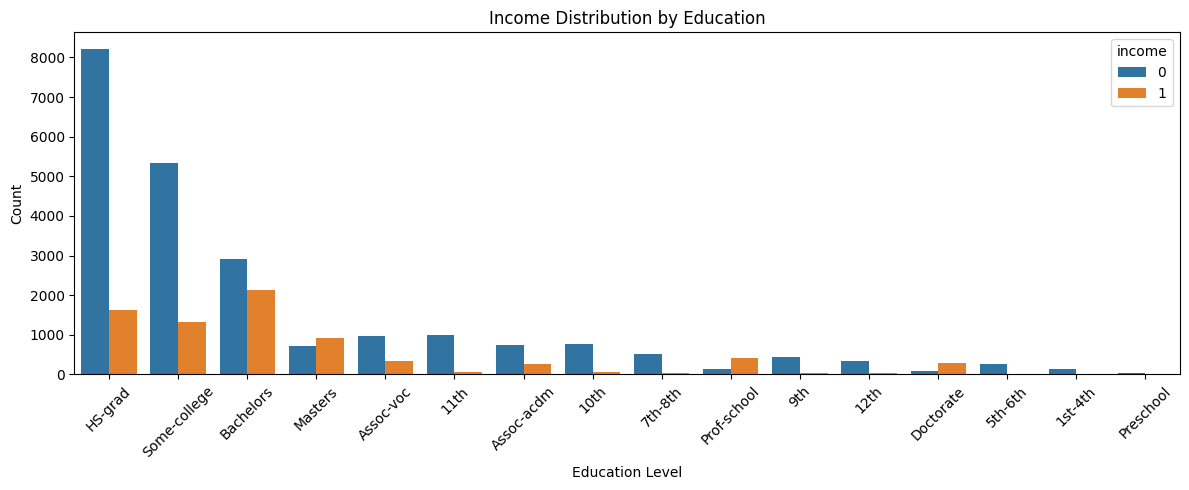

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure charts folder exists
os.makedirs("charts", exist_ok=True)

# Bar chart: income vs education
plt.figure(figsize=(12, 5))
sns.countplot(data=df_cleaned, x='education', hue='income', order=df_cleaned['education'].value_counts().index)
plt.title("Income Distribution by Education")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("charts/question2_income_by_education.png", bbox_inches='tight')
plt.show()

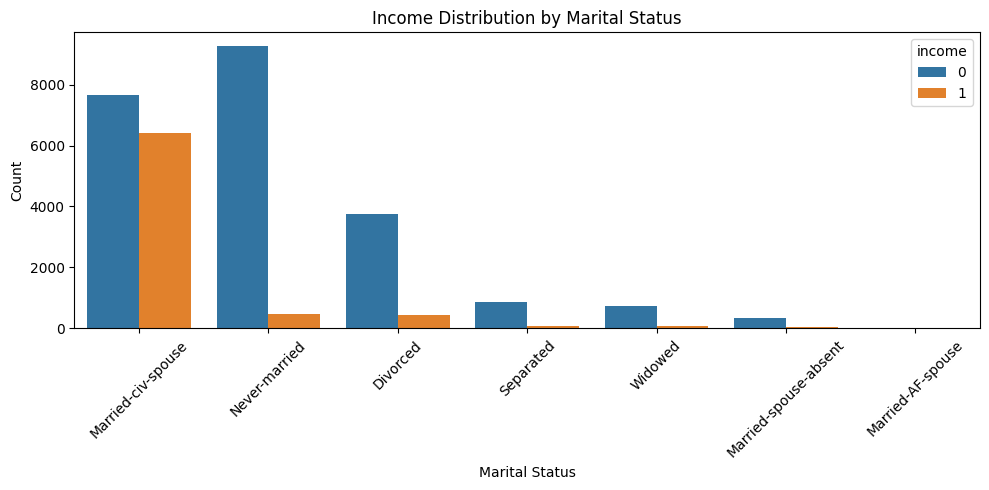

In [14]:
# Bar chart: income vs marital-status
plt.figure(figsize=(10, 5))
sns.countplot(data=df_cleaned, x='marital.status', hue='income', order=df_cleaned['marital.status'].value_counts().index)
plt.title("Income Distribution by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("charts/question2_income_by_marital_status.png", bbox_inches='tight')
plt.show()

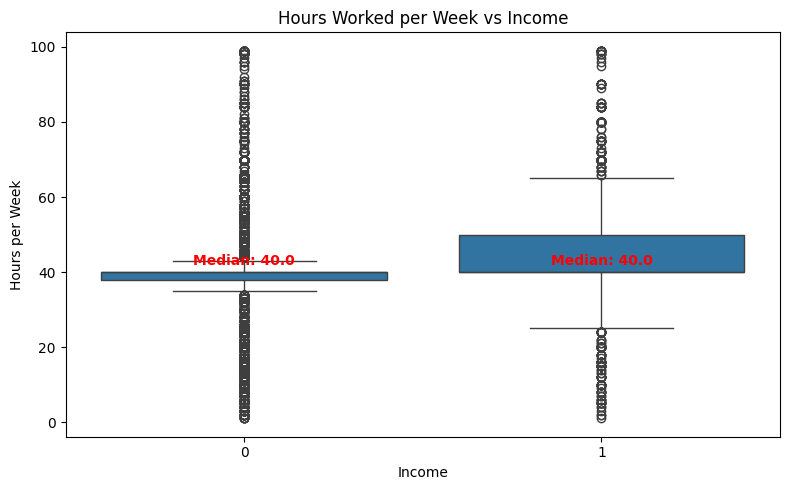

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create the boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_cleaned, x='income', y='hours.per.week')

# Calculate medians
medians = df_cleaned.groupby('income')['hours.per.week'].median()

# Annotate median values on the plot
for i, median in enumerate(medians):
    plt.text(i, median + 2, f"Median: {median:.1f}", color='red', ha='center', fontweight='bold')

# Final touches
plt.title("Hours Worked per Week vs Income")
plt.xlabel("Income")
plt.ylabel("Hours per Week")
plt.tight_layout()
plt.savefig("charts/question2_income_by_hours_per_week.png", bbox_inches='tight')
plt.show()